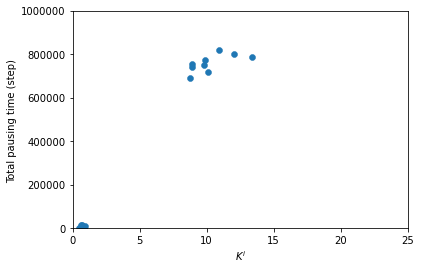

In [41]:
#補正係数と待機時間の散布図を出力するプログラム
import pandas as pd
import os
import matplotlib.pyplot as plt
import pathlib
import numpy as np

#設定
robots_num = 20
#agent_type = "OnebyOne"
agent_type = "TimeChange"
target_type = "5-AMTDS-ESC"
#date = "05-12 05-21-18 robots-number=20_1"
#date = "07-13 17-06-04 robots-number=20_2"
date = "09-14 16-37-55 robots-number=20_1"

counter = 0
time = 3500000
before_time = 2500000
after_time = 3500000
x = []
y = []
#stop_agent_list = [1, 4, 6, 7, 11, 17, 18]
#stop_agent_list = [0, 1, 3, 7, 11, 12, 16]
stop_agent_list = []
stop_number = len(stop_agent_list)
sx = []
sy = []
n = 0
state = "1"
#state = "after"

env = "Office"

for i in range(robots_num):
    df = pd.read_csv("../../../../Volumes/ExternalDisk1/Patrolling/log/TTest/" + agent_type + "/" + env + "/" + target_type + "/" + date + "/Agent" + str(i) + "/Correction.csv", names=['time', 'before', 'after', 'real', 'req'], header=None)
    count = df[df['time'] <= time].tail(1)['after']
    x.append(count)
    
    df = pd.read_csv("../../../../Volumes/ExternalDisk1/Patrolling/log/TTest/" + agent_type + "/" + env + "/" + target_type + "/" + date + "/Agent" + str(i) + "/wait.csv", names=['time', 'battery', 'probability', 'waitTime'], header=None)
    before_count = df[df['time'] < before_time].sum()['waitTime'].item()
    #print(df[df['time'] < before_time].tail(1)['time'] + df[df['time'] < before_time].tail(1)['waitTime'].item())
    if (df[df['time'] < before_time].tail(1)['time'] + df[df['time'] < before_time].tail(1)['waitTime']).item() > before_time:
        before_count -= df[df['time'] < before_time].tail(1)['waitTime'].item()
        before_count += (before_time - df[df['time'] < before_time].tail(1)['time'].item())
        #print("before" + str(before_count.item()))
    
    after_count = df[df['time'] <= after_time].sum()['waitTime'].item()
    if (df[df['time'] <= after_time].tail(1)['time'] + df[df['time'] < after_time].tail(1)['waitTime']).item() > after_time:
        after_count -= df[df['time'] <= after_time].tail(1)['waitTime'].item()
        after_count += (after_time - df[df['time'] <= after_time].tail(1)['time'].item())

    waitTime = after_count - before_count;
    if waitTime > 1000000:
        waitTime = 1000000
        
    y.append(waitTime)
    
    if n < stop_number:
        if i == stop_agent_list[n]:
            sx.append(x[i])
            sy.append(y[i])
            n = n+1
            
#print(y)

plt.scatter(x, y, linewidths=0.5)
plt.scatter(sx, sy, linewidth=0.5, color="red")

#ラベルの追加
plt.xlabel('$K^i$')
plt.ylabel('Total pausing time (step) ')

#表示範囲の指定
plt.xlim(0, 25)
plt.ylim(0, 1000000)

#plt.xticks(np.arange(0, 5, 1))

#指数表記から普通の表記に変換
plt.ticklabel_format(style='plain',axis='y')

#フォルダがない場合は、作成
p_dir = pathlib.Path("../../../../Volumes/ExternalDisk1/Patrolling/result/correction_sccater")
if not p_dir.exists():
    p_dir.mkdir(parents=True)

#グラフの保存
plt.savefig(str(p_dir) + '/' + 'CorrectionScatter_' + state + '_' + date + '.png', bbox_inches="tight")

plt.show()